In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers
from IPython.display import clear_output


In [2]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [3]:
data = np.genfromtxt('data/train.csv', delimiter=',')

In [ ]:
plt.imshow(data[10][2:402].reshape((20,20)))

In [ ]:
plt.imshow(data[10][402:802].reshape((20,20)))

In [10]:


X_train = data[1:20001,402:802]
Y_train = data[1:20001,2:402]

X_test = data[-1001:-1,402:802]
Y_test = data[-1001:-1,2:402]



In [16]:
input_  = keras.Input(shape=(400,))
x = layers.Dense(400, activation = 'relu')(input_)
x = layers.Dense(300, activation = 'relu')(x)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dense(32, activation = 'relu')(x)
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(256, activation = 'relu')(x)
out = layers.Dense(400, activation = 'sigmoid')(x)

In [20]:
model = keras.Model(input_, out)
model.compile(optimizer = 'adam',loss='binary_crossentropy')

In [18]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 400)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_31 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               77056     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 32)                2080

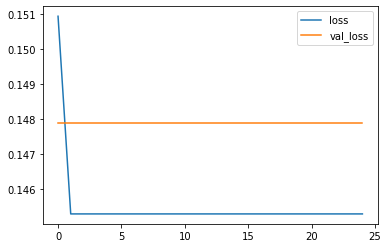

KeyboardInterrupt: 

In [19]:
model.fit(X_train, Y_train,
          epochs = 100,
          batch_size = 128,
          use_multiprocessing=True,
          validation_data=(X_test, Y_test),
          callbacks = [plot_losses],verbose = 0)

In [ ]:
plt.imshow(model.predict(X_test)[10].reshape((20,20)))

In [ ]:
plt.imshow(Y_test[10].reshape((20,20)))